In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/wnba-player-stats-2017/WNBA Stats.csv


In [2]:
df = pd.read_csv('/kaggle/input/wnba-player-stats-2017/WNBA Stats.csv')
df.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [3]:
df['Pos'].value_counts()

Pos
G      60
F      33
C      25
G/F    13
F/C    12
Name: count, dtype: int64

In [4]:
df['Pos'].value_counts(normalize=True) * 100

Pos
G      41.958042
F      23.076923
C      17.482517
G/F     9.090909
F/C     8.391608
Name: proportion, dtype: float64

In [5]:
df['Height'].value_counts().sort_index(ascending=True)

Height
165     1
168     2
170     6
173    11
175    16
178     8
180     7
183    11
185    15
188    20
191    11
193    18
196     9
198     5
201     2
206     1
Name: count, dtype: int64

In [6]:
df['Age'].value_counts(normalize=True)

Age
24    0.111888
23    0.104895
25    0.104895
28    0.097902
27    0.090909
26    0.083916
22    0.069930
30    0.062937
31    0.055944
29    0.055944
32    0.055944
34    0.034965
35    0.027972
33    0.020979
21    0.013986
36    0.006993
Name: proportion, dtype: float64

In [7]:
from scipy.stats import percentileofscore
percentileofscore(a = df['Age'], score = 23, kind = 'weak')

18.88111888111888

In [8]:
(df['Age'].value_counts(normalize=True) * 100).reset_index().query(" Age <= 23 ")['proportion'].sum()

18.881118881118883

In [9]:
df['Age'].value_counts().sort_index(ascending=True)

Age
21     2
22    10
23    15
24    16
25    15
26    12
27    13
28    14
29     8
30     9
31     8
32     8
33     3
34     5
35     4
36     1
Name: count, dtype: int64

In [10]:
df['Weight'].value_counts().sort_index()

Weight
55.0      1
57.0      1
58.0      1
59.0      2
62.0      1
63.0      3
64.0      5
65.0      4
66.0      8
67.0      1
68.0      2
69.0      2
70.0      3
71.0      2
73.0      6
74.0      4
75.0      4
76.0      4
77.0     10
78.0      5
79.0      6
80.0      3
81.0      5
82.0      4
83.0      4
84.0      9
85.0      2
86.0      7
87.0      6
88.0      6
89.0      3
90.0      2
91.0      3
93.0      3
95.0      2
96.0      2
97.0      1
104.0     2
108.0     1
113.0     2
Name: count, dtype: int64

In [11]:
df['Weight'].value_counts(bins=10).sort_index()

Weight
(54.941, 60.8]     5
(60.8, 66.6]      21
(66.6, 72.4]      10
(72.4, 78.2]      33
(78.2, 84.0]      31
(84.0, 89.8]      24
(89.8, 95.6]      10
(95.6, 101.4]      3
(101.4, 107.2]     2
(107.2, 113.0]     3
Name: count, dtype: int64

In [12]:
df['PTS'].value_counts(bins=10,normalize=True).sort_index(ascending=False) * 100

PTS
(525.8, 584.0]     3.496503
(467.6, 525.8]     2.797203
(409.4, 467.6]     5.594406
(351.2, 409.4]     6.993007
(293.0, 351.2]     5.594406
(234.8, 293.0]    11.888112
(176.6, 234.8]    13.986014
(118.4, 176.6]    11.888112
(60.2, 118.4]     16.783217
(1.417, 60.2]     20.979021
Name: proportion, dtype: float64

In [13]:
df['MIN'].value_counts(bins=1)

MIN
(10.993, 1018.0]    143
Name: count, dtype: int64

In [14]:
df['MIN'].value_counts(bins=2)

MIN
(10.993, 515.0]    74
(515.0, 1018.0]    69
Name: count, dtype: int64

In [15]:
df['MIN'].value_counts(bins=3)

MIN
(347.333, 682.667]    50
(10.993, 347.333]     48
(682.667, 1018.0]     45
Name: count, dtype: int64

In [16]:
df['MIN'].value_counts(bins=5)

MIN
(213.2, 414.4]     32
(10.993, 213.2]    29
(615.6, 816.8]     29
(816.8, 1018.0]    28
(414.4, 615.6]     25
Name: count, dtype: int64

In [17]:
df['MIN'].value_counts(bins=10)

MIN
(10.993, 112.6]    19
(816.8, 917.4]     19
(213.2, 313.8]     17
(313.8, 414.4]     15
(615.6, 716.2]     15
(716.2, 816.8]     14
(414.4, 515.0]     13
(515.0, 615.6]     12
(112.6, 213.2]     10
(917.4, 1018.0]     9
Name: count, dtype: int64

In [18]:
df['MIN'].value_counts(bins=15)

MIN
(10.993, 79.067]      14
(213.2, 280.267]      13
(347.333, 414.4]      13
(816.8, 883.867]      13
(615.6, 682.667]      12
(79.067, 146.133]     11
(883.867, 950.933]    11
(548.533, 615.6]       9
(682.667, 749.733]     9
(414.4, 481.467]       8
(481.467, 548.533]     8
(749.733, 816.8]       8
(280.267, 347.333]     6
(146.133, 213.2]       4
(950.933, 1018.0]      4
Name: count, dtype: int64

In [19]:
df['MIN'].value_counts(bins=20)

MIN
(10.993, 62.3]     12
(816.8, 867.1]     12
(213.2, 263.5]     11
(716.2, 766.5]     10
(364.1, 414.4]      9
(565.3, 615.6]      8
(665.9, 716.2]      8
(917.4, 967.7]      7
(464.7, 515.0]      7
(62.3, 112.6]       7
(615.6, 665.9]      7
(867.1, 917.4]      7
(112.6, 162.9]      6
(263.5, 313.8]      6
(313.8, 364.1]      6
(414.4, 464.7]      6
(515.0, 565.3]      4
(766.5, 816.8]      4
(162.9, 213.2]      4
(967.7, 1018.0]     2
Name: count, dtype: int64

In [20]:
df['MIN'].value_counts(bins=40)

MIN
(37.15, 62.3]       7
(213.2, 238.35]     7
(816.8, 841.95]     6
(841.95, 867.1]     6
(364.1, 389.25]     6
(590.45, 615.6]     5
(665.9, 691.05]     5
(716.2, 741.35]     5
(439.55, 464.7]     5
(741.35, 766.5]     5
(10.993, 37.15]     5
(263.5, 288.65]     4
(338.95, 364.1]     4
(238.35, 263.5]     4
(892.25, 917.4]     4
(489.85, 515.0]     4
(112.6, 137.75]     4
(87.45, 112.6]      4
(942.55, 967.7]     4
(615.6, 640.75]     4
(640.75, 665.9]     3
(791.65, 816.8]     3
(867.1, 892.25]     3
(917.4, 942.55]     3
(691.05, 716.2]     3
(515.0, 540.15]     3
(565.3, 590.45]     3
(464.7, 489.85]     3
(389.25, 414.4]     3
(188.05, 213.2]     3
(62.3, 87.45]       3
(313.8, 338.95]     2
(288.65, 313.8]     2
(137.75, 162.9]     2
(992.85, 1018.0]    2
(540.15, 565.3]     1
(414.4, 439.55]     1
(766.5, 791.65]     1
(162.9, 188.05]     1
(967.7, 992.85]     0
Name: count, dtype: int64

In [21]:
df['PTS'].value_counts(bins=6).sort_index(ascending=True)

PTS
(1.417, 99.0]     48
(99.0, 196.0]     27
(196.0, 293.0]    33
(293.0, 390.0]    13
(390.0, 487.0]    13
(487.0, 584.0]     9
Name: count, dtype: int64

In [22]:
intervals = pd.interval_range(0,600,freq=100)
df['PTS'].value_counts(bins=intervals)

PTS
(0, 100]      49
(200, 300]    32
(100, 200]    28
(300, 400]    17
(400, 500]    10
(500, 600]     7
Name: count, dtype: int64

In [23]:
print(df['Height'].value_counts().sort_index(ascending=True))
print(df['Height'].value_counts().sort_index(ascending=True)[175])



Height
165     1
168     2
170     6
173    11
175    16
178     8
180     7
183    11
185    15
188    20
191    11
193    18
196     9
198     5
201     2
206     1
Name: count, dtype: int64
16


In [24]:
df['Height'].describe().iloc[3:]

min    165.0
25%    176.5
50%    185.0
75%    191.0
max    206.0
Name: Height, dtype: float64

Create PTS Ordinal Scale

In [25]:
(df['Age'].value_counts(normalize=True) * 100)

Age
24    11.188811
23    10.489510
25    10.489510
28     9.790210
27     9.090909
26     8.391608
22     6.993007
30     6.293706
31     5.594406
29     5.594406
32     5.594406
34     3.496503
35     2.797203
33     2.097902
21     1.398601
36     0.699301
Name: proportion, dtype: float64

In [26]:
(df['Age'].value_counts(normalize=True)).reset_index().query(" Age == 30 ")['proportion'].sum()

0.06293706293706294

In [27]:
(df['Age'].value_counts(normalize=True) * 100).reset_index().query(" Age == 30 ")['proportion'].sum()

6.293706293706294

In [28]:
def set_ordinal_scale(row,col):
    if row[col] <= 20:
        return 'very few points'
    elif row[col] > 20 and row[col] <= 80:
        return 'few points'
    elif row[col] > 80 and row[col] <= 150:
        return 'many points'
    elif row[col] > 150:
        return 'a lot of points'

In [29]:
df['PTS_ordinal_scale'] = df.apply(set_ordinal_scale,args=('PTS',),axis=1)

In [30]:
df['PTS_ordinal_scale'].value_counts()[['very few points', 'few points', 'many points', 'a lot of points']]

PTS_ordinal_scale
very few points    12
few points         27
many points        25
a lot of points    79
Name: count, dtype: int64

In [31]:
np.float64(0.1048951048951049)

0.1048951048951049

In [32]:
df['Age'].describe().iloc[3:]

min    21.0
25%    24.0
50%    27.0
75%    30.0
max    36.0
Name: Age, dtype: float64

In [33]:
df['Age'].describe(percentiles=[.25,.75]).iloc[3:]

min    21.0
25%    24.0
50%    27.0
75%    30.0
max    36.0
Name: Age, dtype: float64

In [34]:
df['Age'].describe(percentiles=[.75,.50,.95]).reset_index().query(" index=='75%' ")['Age'].values[0]

30.0

In [35]:
def get_exp_years(x):
    if x == 0:
        return 'Rookie'
    elif (x >= 1) and (x <= 3):
        return 'Little experience'
    elif (x >= 4) and (x <= 5):
        return 'Experienced'
    elif (x > 5) and (x <= 10):
        return 'Very experienced'
    elif (x > 10):
        return 'Veteran'

In [36]:
df['Experience'].replace('R',0,inplace=True)

In [37]:
df['Experience'] = df['Experience'].astype(int)

In [38]:
df['Exp_ordinal'] = df['Experience'].apply(get_exp_years)

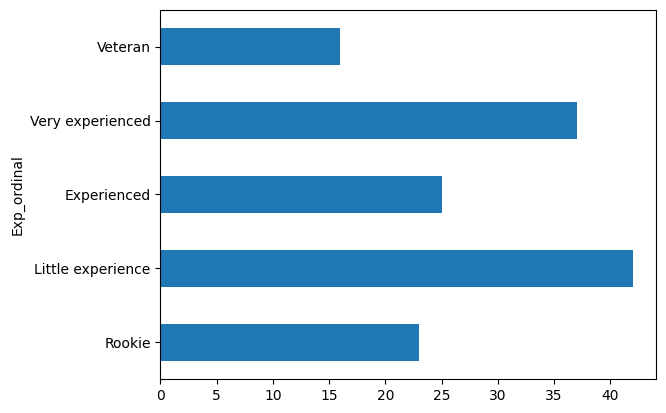

In [39]:
df['Exp_ordinal'].value_counts()[['Rookie','Little experience','Experienced','Very experienced','Veteran']].plot.barh()
plt.show()

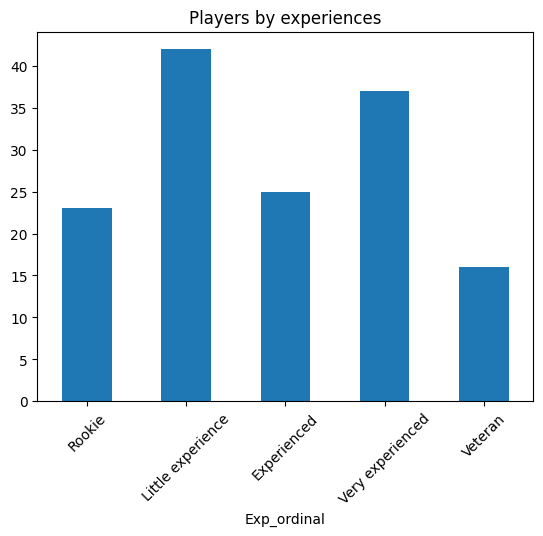

In [40]:
df['Exp_ordinal'].value_counts()[['Rookie','Little experience','Experienced','Very experienced','Veteran']].plot.bar(rot=45,title='Players by experiences')
plt.show()

<Axes: xlabel='Pos'>

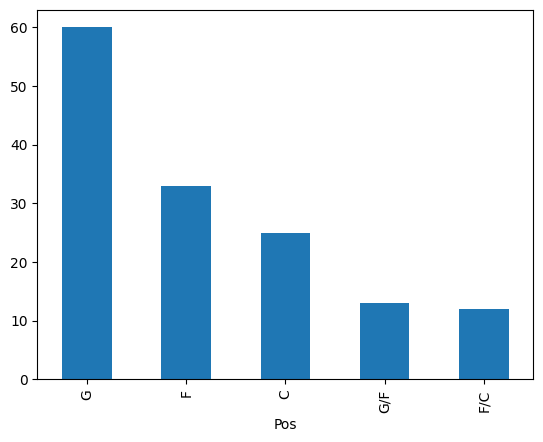

In [41]:
df['Pos'].value_counts().plot.bar()

<Axes: ylabel='count'>

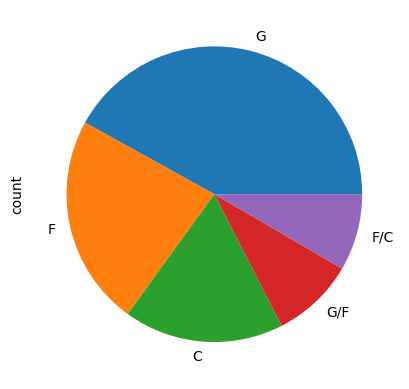

In [42]:
df['Pos'].value_counts().plot.pie()

Text(0, 0.5, '')

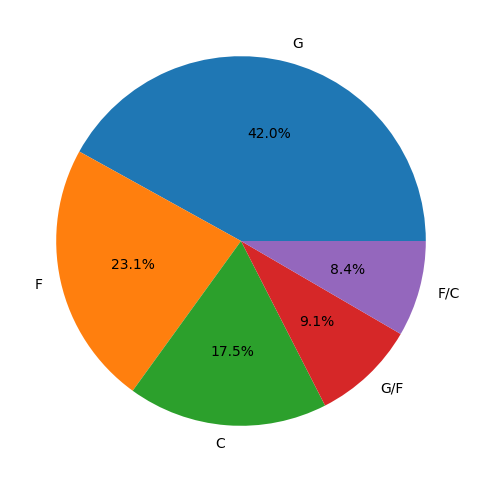

In [43]:
df['Pos'].value_counts().plot.pie(figsize=(6,6),autopct='%.1f%%')
plt.ylabel('')


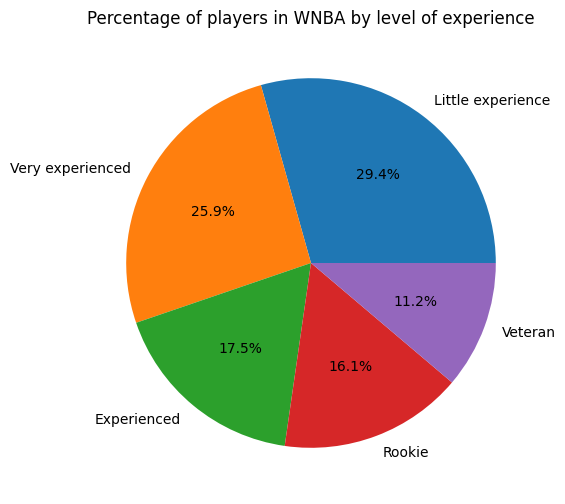

In [49]:
df['Exp_ordinal'].value_counts().plot.pie(figsize=(6,6),autopct='%.1f%%')
plt.ylabel('')
plt.title("Percentage of players in WNBA by level of experience")
plt.show()

In [50]:
df['PTS'].describe()

count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64

<Axes: ylabel='Frequency'>

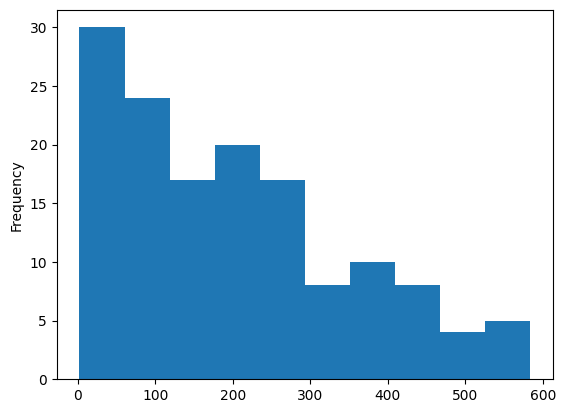

In [51]:
df['PTS'].plot.hist()

In [57]:
df['PTS'].describe()

count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64

In [53]:
df['PTS'].value_counts(bins=10).sort_index(ascending=True)

PTS
(1.417, 60.2]     30
(60.2, 118.4]     24
(118.4, 176.6]    17
(176.6, 234.8]    20
(234.8, 293.0]    17
(293.0, 351.2]     8
(351.2, 409.4]    10
(409.4, 467.6]     8
(467.6, 525.8]     4
(525.8, 584.0]     5
Name: count, dtype: int64

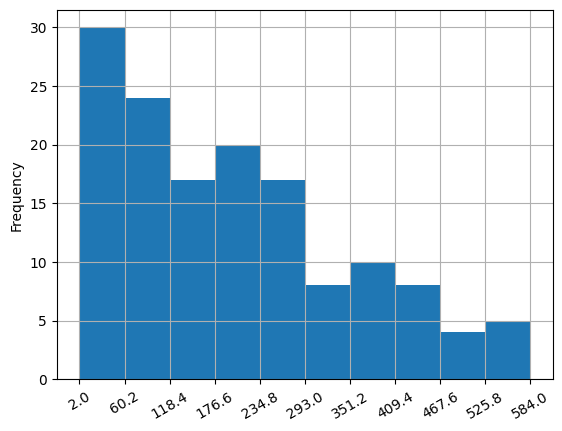

In [56]:
df['PTS'].plot.hist(grid=True,xticks = np.arange(2,585, 60.2 - 2), rot=30)
plt.show()

In [58]:
df['Games Played'].describe()

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64

<Axes: ylabel='Frequency'>

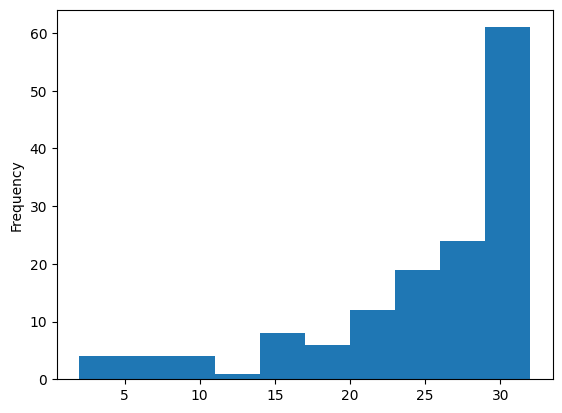

In [59]:
df['Games Played'].plot.hist()

In [60]:
df['PTS'].describe()

count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64

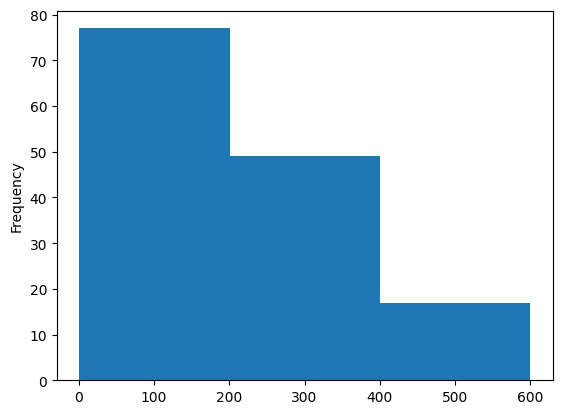

In [61]:
df['PTS'].plot.hist(range=(1,600),bins=3)
plt.show()

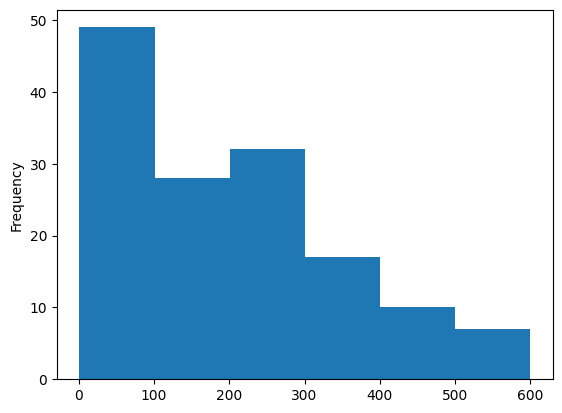

In [62]:
df['PTS'].plot.hist(range=(1,600),bins=6)
plt.show()

In [67]:
32//4

8

<Axes: ylabel='Frequency'>

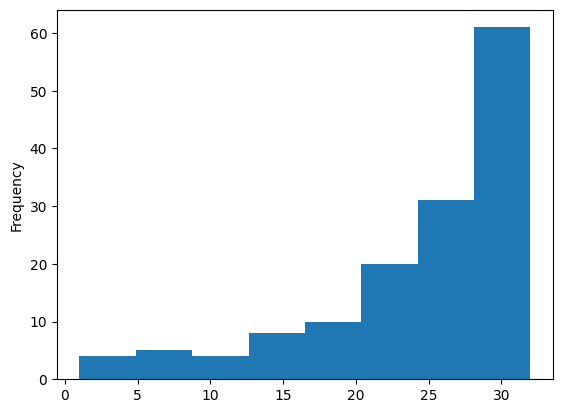

In [64]:
# 32 
df['Games Played'].plot.hist(bins=32//4,range=(1,32))

In [66]:
df['Games Played'].value_counts(bins=8).sort_index()

Games Played
(1.969, 5.75]     5
(5.75, 9.5]       5
(9.5, 13.25]      3
(13.25, 17.0]    10
(17.0, 20.75]     8
(20.75, 24.5]    20
(24.5, 28.25]    31
(28.25, 32.0]    61
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

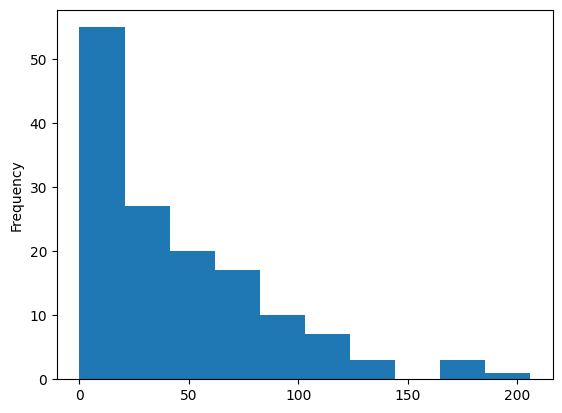

In [68]:
df['AST'].plot.hist()

<Axes: ylabel='Frequency'>

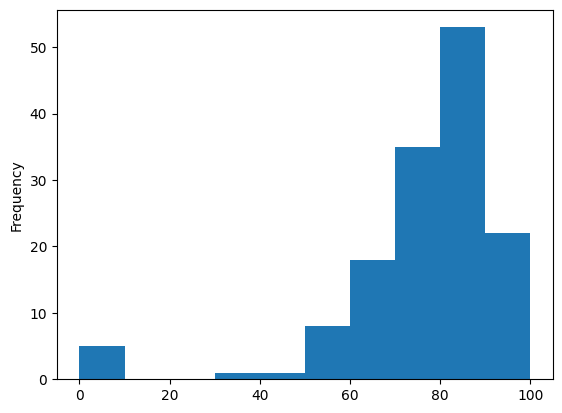

In [69]:
df['FT%'].plot.hist()

<Axes: ylabel='Frequency'>

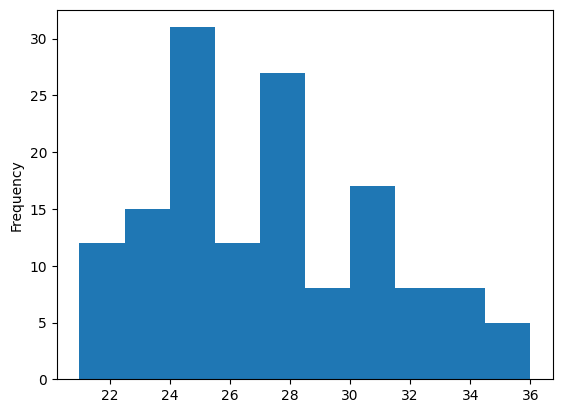

In [70]:
df['Age'].plot.hist()

<Axes: ylabel='Frequency'>

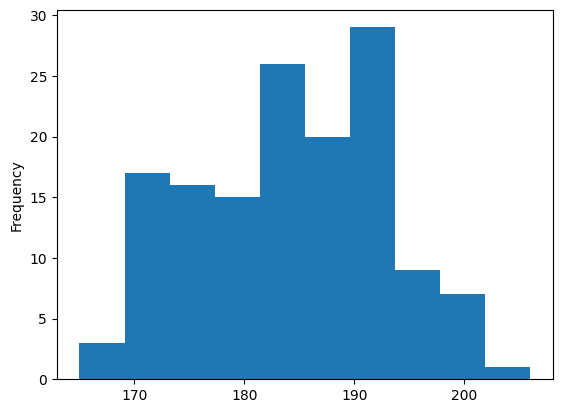

In [71]:
df['Height'].plot.hist()

<Axes: ylabel='Frequency'>

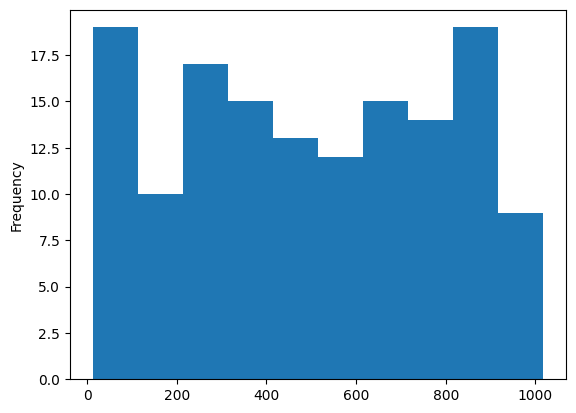

In [72]:
df['MIN'].plot.hist()